In [1]:
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg

In [2]:
import matplotlib.pyplot as plt

In [3]:
import cProfile
import pstats

--------

### Set the number of resources

In [4]:
L = 10

### Define the ancestral phenotype (traits vector)

In [5]:
anc_phenotype = utils.random_matrix(shape=(L, L), mode='binomial')

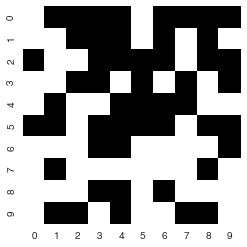

In [6]:
viz.matrix_plot(anc_phenotype)

### Define the system biochemistry (trait/resource interactions)

In [7]:
J = utils.random_matrix((L, L), 'tikhonov_sigmoid')

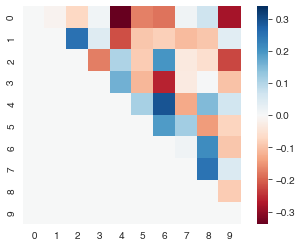

In [8]:
viz.matrix_plot(J)

### Parameterize and instantiate the Consumer-Resource System

In [9]:
anc_system = ConsumerResourceSystem(sigma=anc_phenotype, 
                                    b=1, k=1e10, c=0.1, chi=0.5, J=J, mu=1e-10,
                                    resource_consumption_mode='fast_resource_eq',
                                    resource_inflow_mode='none',
                                    threshold_min_rel_abundance=1e-6,
                                    N_init=1, R_init=1)

### Simulate dynamics

In [10]:
# just to pre-compile the dynamics njit function
# anc_system.dynamics(*((0,) + (np.zeros(L+L+1),) + anc_system.get_params()))

In [11]:
# anc_system.run(T=1000)

In [12]:
%load_ext line_profiler

In [13]:
%lprun -f ConsumerResourceSystem.dynamics anc_system.run(T=1000)

Timer unit: 1e-06 s

Total time: 0.121745 s
File: /Users/ryan/Dropbox/Projects/ResearchProjects/eco-evo-crm/ecoevocrm/src/ecoevocrm/consumer_resource_system.py
Function: dynamics at line 258

Line #      Hits         Time  Per Hit   % Time  Line Contents
   258                                               @staticmethod
   259                                               # @jit(nopython=True, fastmath=True, cache=True)
   260                                               def dynamics(t, variables, 
   261                                                               num_types, num_mutants, sigma, b, k, eta, l, g, c, chi, J, mu, energy_costs,
   262                                                               num_resources, rho, tau, omega, D, resource_consumption_mode, resource_inflow_mode, deltas, 
   263                                                               energy_uptake_coeffs):
   264                                           
   265       951       2358.0      2.5      1

In [14]:
# profile = cProfile.Profile()
# profile.runcall(anc_system.run)

### Visualize results

In [15]:
type_colors = viz.color_types_by_phylogeny(anc_system.type_set, apply_palette_depth=0)

<AxesSubplot:>

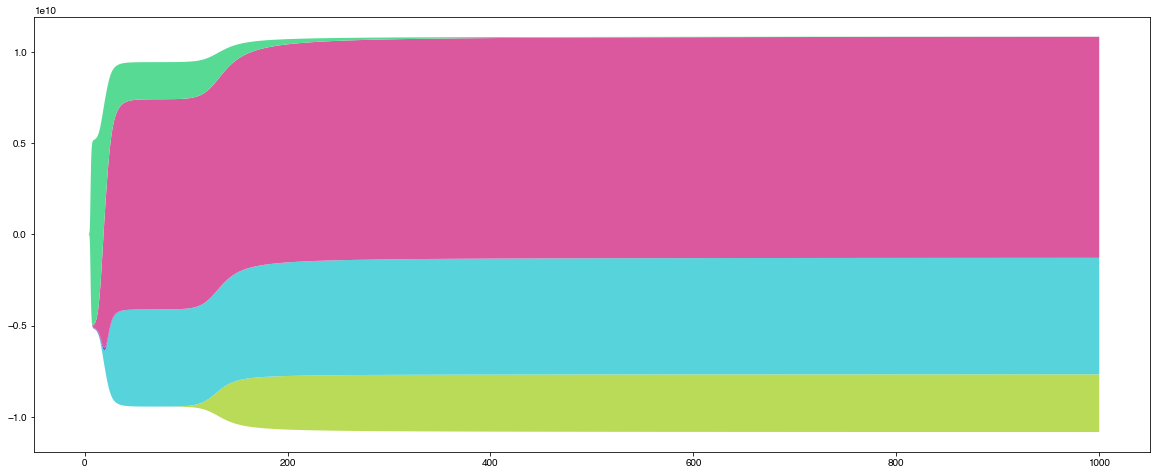

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(anc_system, ax=ax, type_colors=type_colors)

In [17]:
# ps = pstats.Stats(profile)
# ps.sort_stats('cumtime')
# ps.print_stats()

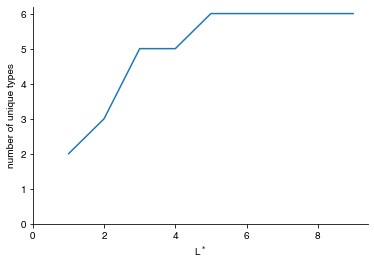

In [18]:
viz.Lstar_types_plot(anc_system)

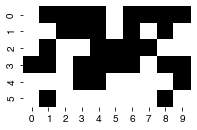

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(3, 12))
viz.matrix_plot(anc_system.get_extant_type_set().sigma, ax=ax)

In [20]:
anc_system.t_series

array([0.00000000e+00, 7.81458260e-03, 1.56291652e-02, 5.52083019e-02,
       9.47874385e-02, 1.34366575e-01, 2.04658455e-01, 2.74950335e-01,
       3.45242215e-01, 4.15534095e-01, 5.09192920e-01, 6.02851746e-01,
       6.96510571e-01, 7.90169396e-01, 8.83828222e-01, 9.94920593e-01,
       1.10601297e+00, 1.21710534e+00, 1.32819771e+00, 1.43929008e+00,
       1.55038245e+00, 1.66147483e+00, 1.77256720e+00, 1.88365958e+00,
       1.99475195e+00, 2.10584436e+00, 2.21693676e+00, 2.32802916e+00,
       2.43912156e+00, 2.55021396e+00, 2.66130659e+00, 2.77239921e+00,
       2.88349184e+00, 2.99458447e+00, 3.10567709e+00, 3.21677174e+00,
       3.32786639e+00, 3.43896104e+00, 3.55005569e+00, 3.66115034e+00,
       3.77226360e+00, 3.88337686e+00, 3.99449013e+00, 4.10560339e+00,
       4.21671665e+00, 4.32800388e+00, 4.43929110e+00, 4.55057833e+00,
       4.66186555e+00, 4.77315278e+00, 4.88608267e+00, 4.99901255e+00,
       5.11194244e+00, 5.22487233e+00, 5.33780222e+00, 5.46671745e+00,
      

In [21]:
delta_t = [anc_system.t_series[i] - anc_system.t_series[i-1] for i in range(1,len(anc_system.t_series))]
# delta_t

(array([ 5.,  9., 45.,  5.,  4., 12.,  0.,  0., 15.,  0.,  4.,  9.,  5.,
         5., 34.,  0., 15.,  9.,  0.,  9.,  0.,  0.,  6.,  7.,  8., 13.,
         4.,  0.,  0.,  0.,  0.,  1.,  8.,  0.,  0.,  0., 11.,  5.,  0.,
         0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

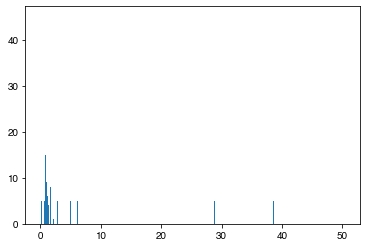

In [22]:
plt.hist(delta_t, bins=1000)